# Counties and their Cancer Rates

In [201]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", 100)

In [202]:
cancer = pd.read_csv("data/cleaned/nih_cancer_counties_20221111.csv")
cancer.sort_values(by = " FIPS").head()

,FIPS,"Age-Adjusted Incidence Rate([rate note]) - cases per 100,000",Lower 95% Confidence Interval,Upper 95% Confidence Interval,CI*Rank([rank note]),Lower CI (CI*Rank),Upper CI (CI*Rank),Average Annual Count,Recent Trend,Recent 5-Year Trend ([trend note]) in Incidence Rates,Lower 95% Confidence Interval.1,Upper 95% Confidence Interval.1,County-State
465,1001,124.6,108.6,142.3,N/A,3,56,44,stable,0.3,-0.9,1.5,autauga-al
1484,1003,105.6,97.6,114,N/A,24,62,130,rising,1,0.3,1.6,baldwin-al
2494,1005,77.9,59.2,100.7,N/A,38,67,12,stable,-1.6,-3.9,0.6,barbour-al
812,1007,116.3,92.7,144,N/A,3,66,17,stable,2.1,0,4.3,bibb-al
1950,1009,97.4,83.2,113.3,N/A,21,67,34,stable,0.4,-1.1,2,blount-al


In [203]:
county_info = pd.read_csv("data/processed/county_information.csv")
county_info.head()

,name,fips,age_over_65,state,pop2000,pop2010,pop2017,pop_change,poverty,homeownership,multi_unit,unemployment_rate,metro,median_edu,per_capita_income,median_hh_income,smoking_ban
0,Autauga County,1001,15.0,Alabama,43671.0,54571,55504.0,1.48,13.7,77.5,7.2,3.86,yes,some_college,27841.70,55317.0,none
1,Baldwin County,1003,20.0,Alabama,140415.0,182265,212628.0,9.19,11.8,76.7,22.6,3.99,yes,some_college,27779.85,52562.0,none
2,Barbour County,1005,18.6,Alabama,29038.0,27457,25270.0,-6.22,27.2,68.0,11.1,5.90,no,hs_diploma,17891.73,33368.0,partial
3,Bibb County,1007,15.9,Alabama,20826.0,22915,22668.0,0.73,15.2,82.9,6.6,4.39,yes,hs_diploma,20572.05,43404.0,none
4,Blount County,1009,17.9,Alabama,51024.0,57322,58013.0,0.68,15.6,82.0,3.7,4.02,yes,hs_diploma,21367.39,47412.0,none


In [204]:
# Dataframes are roughly the same length.
print(county_info.shape)
print(cancer.shape)

(3142, 17)
(3139, 13)


In [205]:
cancer.columns

Index([' FIPS', 'Age-Adjusted Incidence Rate([rate note]) - cases per 100,000',
       'Lower 95% Confidence Interval', 'Upper 95% Confidence Interval',
       'CI*Rank([rank note])', 'Lower CI (CI*Rank)', 'Upper CI (CI*Rank)',
       'Average Annual Count', 'Recent Trend',
       'Recent 5-Year Trend ([trend note]) in Incidence Rates',
       'Lower 95% Confidence Interval.1', 'Upper 95% Confidence Interval.1',
       'County-State'],
      dtype='object')

In [206]:
#[county for county in cancer[" FIPS"].astype(str) if county not in county_info["fips"].astype(str)]
#cancer[" FIPS"].hist()
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3139 entries, 0 to 3138
Data columns (total 13 columns):
 #   Column                                                        Non-Null Count  Dtype 
---  ------                                                        --------------  ----- 
 0    FIPS                                                         3139 non-null   int64 
 1   Age-Adjusted Incidence Rate([rate note]) - cases per 100,000  3139 non-null   object
 2   Lower 95% Confidence Interval                                 3139 non-null   object
 3   Upper 95% Confidence Interval                                 3139 non-null   object
 4   CI*Rank([rank note])                                          3139 non-null   object
 5   Lower CI (CI*Rank)                                            3139 non-null   object
 6   Upper CI (CI*Rank)                                            3139 non-null   object
 7   Average Annual Count                                          3139 non-null   

In [207]:
#county_info["fips"].hist()
county_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3142 entries, 0 to 3141
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               3142 non-null   object 
 1   fips               3142 non-null   int64  
 2   age_over_65        3142 non-null   float64
 3   state              3142 non-null   object 
 4   pop2000            3139 non-null   float64
 5   pop2010            3142 non-null   int64  
 6   pop2017            3139 non-null   float64
 7   pop_change         3139 non-null   float64
 8   poverty            3140 non-null   float64
 9   homeownership      3142 non-null   float64
 10  multi_unit         3142 non-null   float64
 11  unemployment_rate  3139 non-null   float64
 12  metro              3139 non-null   object 
 13  median_edu         3140 non-null   object 
 14  per_capita_income  3140 non-null   float64
 15  median_hh_income   3140 non-null   float64
 16  smoking_ban        2562 

In [208]:
county_cancer = county_info.merge(cancer, left_on = "fips", right_on = " FIPS", how = "left")
county_cancer.head()

,name,fips,age_over_65,state,pop2000,pop2010,pop2017,pop_change,poverty,homeownership,multi_unit,unemployment_rate,metro,median_edu,per_capita_income,median_hh_income,smoking_ban,FIPS,"Age-Adjusted Incidence Rate([rate note]) - cases per 100,000",Lower 95% Confidence Interval,Upper 95% Confidence Interval,CI*Rank([rank note]),Lower CI (CI*Rank),Upper CI (CI*Rank),Average Annual Count,Recent Trend,Recent 5-Year Trend ([trend note]) in Incidence Rates,Lower 95% Confidence Interval.1,Upper 95% Confidence Interval.1,County-State
0,Autauga County,1001,15.0,Alabama,43671.0,54571,55504.0,1.48,13.7,77.5,7.2,3.86,yes,some_college,27841.70,55317.0,none,1001.0,124.6,108.6,142.3,N/A,3,56,44,stable,0.3,-0.9,1.5,autauga-al
1,Baldwin County,1003,20.0,Alabama,140415.0,182265,212628.0,9.19,11.8,76.7,22.6,3.99,yes,some_college,27779.85,52562.0,none,1003.0,105.6,97.6,114,N/A,24,62,130,rising,1,0.3,1.6,baldwin-al
2,Barbour County,1005,18.6,Alabama,29038.0,27457,25270.0,-6.22,27.2,68.0,11.1,5.90,no,hs_diploma,17891.73,33368.0,partial,1005.0,77.9,59.2,100.7,N/A,38,67,12,stable,-1.6,-3.9,0.6,barbour-al
3,Bibb County,1007,15.9,Alabama,20826.0,22915,22668.0,0.73,15.2,82.9,6.6,4.39,yes,hs_diploma,20572.05,43404.0,none,1007.0,116.3,92.7,144,N/A,3,66,17,stable,2.1,0,4.3,bibb-al
4,Blount County,1009,17.9,Alabama,51024.0,57322,58013.0,0.68,15.6,82.0,3.7,4.02,yes,hs_diploma,21367.39,47412.0,none,1009.0,97.4,83.2,113.3,N/A,21,67,34,stable,0.4,-1.1,2,blount-al


In [209]:
print(county_info.shape)
print(cancer.shape)
print(county_cancer.shape)

(3142, 17)
(3139, 13)
(3142, 30)


In [210]:
county_cancer.isnull().sum()

name                                                              0
fips                                                              0
age_over_65                                                       0
state                                                             0
pop2000                                                           3
pop2010                                                           0
pop2017                                                           3
pop_change                                                        3
poverty                                                           2
homeownership                                                     0
multi_unit                                                        0
unemployment_rate                                                 3
metro                                                             3
median_edu                                                        2
per_capita_income                               

In [211]:
county_cancer["smoking_ban"].value_counts()

none       1927
partial     635
Name: smoking_ban, dtype: int64

In [212]:
county_cancer["smoking_ban"] = county_cancer["smoking_ban"].map({
    "none" : 0,
    "partial" : 0.5,
    np.nan : 1}
)

In [213]:
county_cancer = county_cancer[county_cancer[" FIPS"].notna()].drop(columns = [" FIPS", "County-State", "pop2000", "pop2010", "popchange"])

county_cancer.head()

KeyError: "['popchange'] not found in axis"

In [ ]:
county_cancer.info()

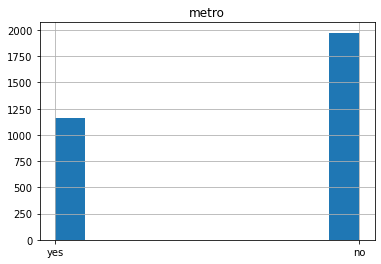

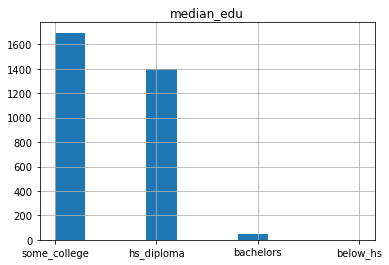

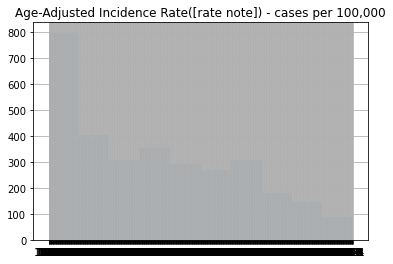

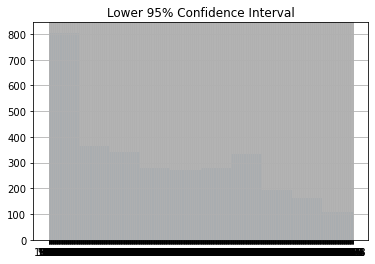

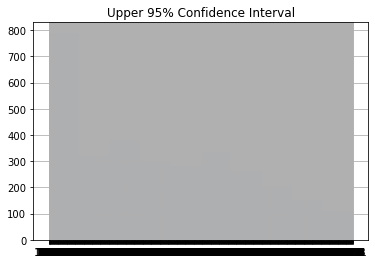

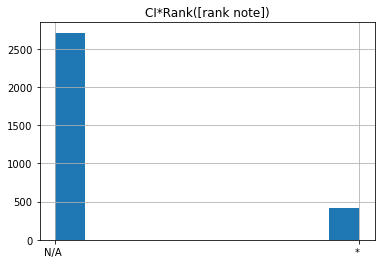

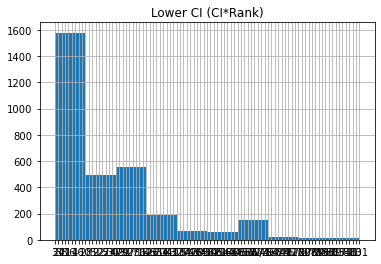

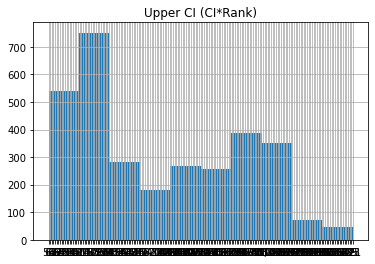

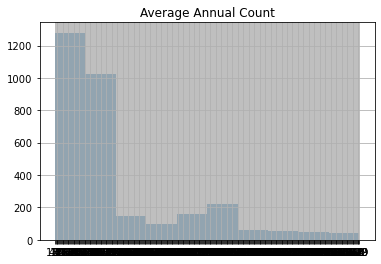

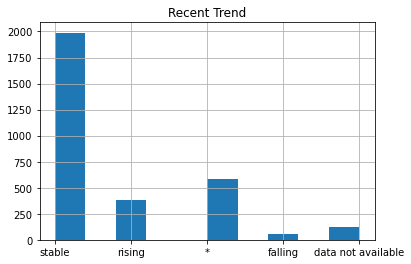

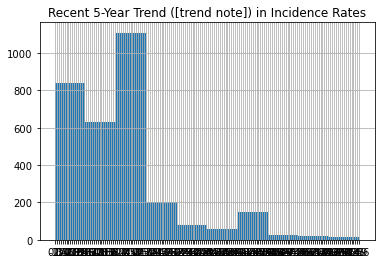

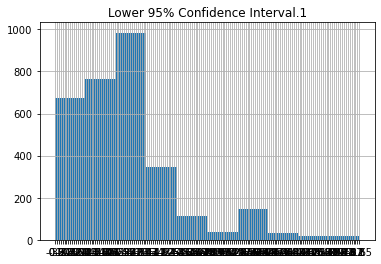

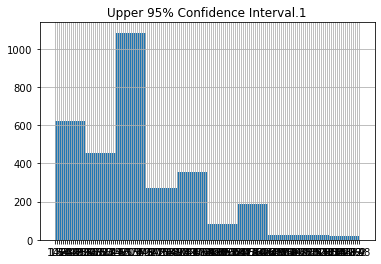

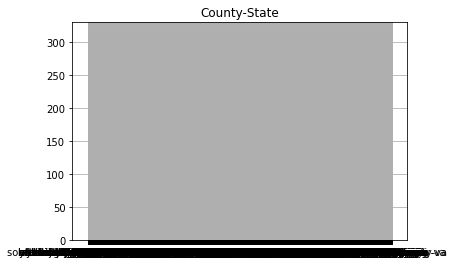

In [214]:
colnames = county_cancer.drop(columns = ["name", "state"]).select_dtypes("object").columns
#print(colnames)

for col in colnames:
    county_cancer[col].hist()
    plt.title(col)
    plt.show()
#county_cancer["median_edu"].hist(ax = ax[i])

In [215]:
county_cancer.rename(columns = {"Age-Adjusted Incidence Rate([rate note]) - cases per 100,000" : "incidence_rate_per_100k",
                               "Recent 5-Year Trend ([trend note]) in Incidence Rates" : "5yr_trend"}, inplace = True)
county_cancer.head()

,name,fips,age_over_65,state,pop2000,pop2010,pop2017,pop_change,poverty,homeownership,multi_unit,unemployment_rate,metro,median_edu,per_capita_income,median_hh_income,smoking_ban,FIPS,incidence_rate_per_100k,Lower 95% Confidence Interval,Upper 95% Confidence Interval,CI*Rank([rank note]),Lower CI (CI*Rank),Upper CI (CI*Rank),Average Annual Count,Recent Trend,5yr_trend,Lower 95% Confidence Interval.1,Upper 95% Confidence Interval.1,County-State
0,Autauga County,1001,15.0,Alabama,43671.0,54571,55504.0,1.48,13.7,77.5,7.2,3.86,yes,some_college,27841.70,55317.0,0.0,1001.0,124.6,108.6,142.3,N/A,3,56,44,stable,0.3,-0.9,1.5,autauga-al
1,Baldwin County,1003,20.0,Alabama,140415.0,182265,212628.0,9.19,11.8,76.7,22.6,3.99,yes,some_college,27779.85,52562.0,0.0,1003.0,105.6,97.6,114,N/A,24,62,130,rising,1,0.3,1.6,baldwin-al
2,Barbour County,1005,18.6,Alabama,29038.0,27457,25270.0,-6.22,27.2,68.0,11.1,5.90,no,hs_diploma,17891.73,33368.0,0.5,1005.0,77.9,59.2,100.7,N/A,38,67,12,stable,-1.6,-3.9,0.6,barbour-al
3,Bibb County,1007,15.9,Alabama,20826.0,22915,22668.0,0.73,15.2,82.9,6.6,4.39,yes,hs_diploma,20572.05,43404.0,0.0,1007.0,116.3,92.7,144,N/A,3,66,17,stable,2.1,0,4.3,bibb-al
4,Blount County,1009,17.9,Alabama,51024.0,57322,58013.0,0.68,15.6,82.0,3.7,4.02,yes,hs_diploma,21367.39,47412.0,0.0,1009.0,97.4,83.2,113.3,N/A,21,67,34,stable,0.4,-1.1,2,blount-al


In [216]:
county_cancer.drop(columns = ["per_capita_income", 'Lower 95% Confidence Interval', 'Upper 95% Confidence Interval',
                              'CI*Rank([rank note])', 'Lower CI (CI*Rank)', 'Upper CI (CI*Rank)', 'Average Annual Count', 
                              'Lower 95% Confidence Interval.1', 'Upper 95% Confidence Interval.1'], inplace = True)

In [217]:
county_cancer.replace("* ", np.nan, inplace = True)
county_cancer.replace("*", np.nan, inplace = True)
county_cancer.replace("data not available ", np.nan, inplace = True)
county_cancer.replace("data not available", np.nan, inplace = True)
county_cancer["incidence_rate_per_100k"] = county_cancer["incidence_rate_per_100k"].astype(float)
county_cancer["5yr_trend"] = county_cancer["5yr_trend"].astype(float)

In [218]:
county_cancer.head()

,name,fips,age_over_65,state,pop2000,pop2010,pop2017,pop_change,poverty,homeownership,multi_unit,unemployment_rate,metro,median_edu,median_hh_income,smoking_ban,FIPS,incidence_rate_per_100k,Recent Trend,5yr_trend,County-State
0,Autauga County,1001,15.0,Alabama,43671.0,54571,55504.0,1.48,13.7,77.5,7.2,3.86,yes,some_college,55317.0,0.0,1001.0,124.6,stable,0.3,autauga-al
1,Baldwin County,1003,20.0,Alabama,140415.0,182265,212628.0,9.19,11.8,76.7,22.6,3.99,yes,some_college,52562.0,0.0,1003.0,105.6,rising,1.0,baldwin-al
2,Barbour County,1005,18.6,Alabama,29038.0,27457,25270.0,-6.22,27.2,68.0,11.1,5.90,no,hs_diploma,33368.0,0.5,1005.0,77.9,stable,-1.6,barbour-al
3,Bibb County,1007,15.9,Alabama,20826.0,22915,22668.0,0.73,15.2,82.9,6.6,4.39,yes,hs_diploma,43404.0,0.0,1007.0,116.3,stable,2.1,bibb-al
4,Blount County,1009,17.9,Alabama,51024.0,57322,58013.0,0.68,15.6,82.0,3.7,4.02,yes,hs_diploma,47412.0,0.0,1009.0,97.4,stable,0.4,blount-al


In [219]:
obj_cols = county_cancer.select_dtypes("object")
obj_cols.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3142 entries, 0 to 3141
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   name          3142 non-null   object
 1   state         3142 non-null   object
 2   metro         3139 non-null   object
 3   median_edu    3140 non-null   object
 4   Recent Trend  2426 non-null   object
 5   County-State  3133 non-null   object
dtypes: object(6)
memory usage: 171.8+ KB


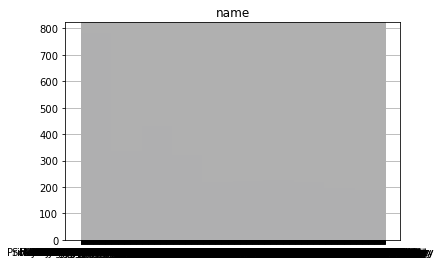

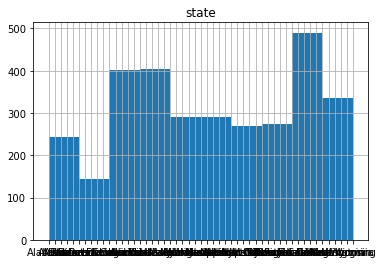

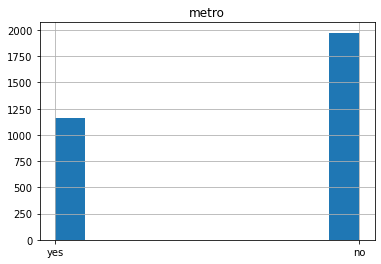

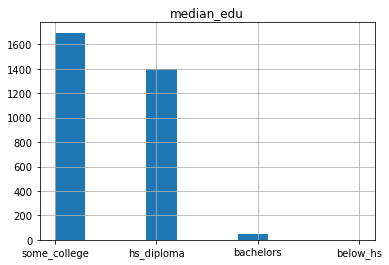

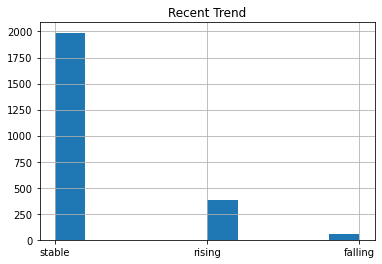

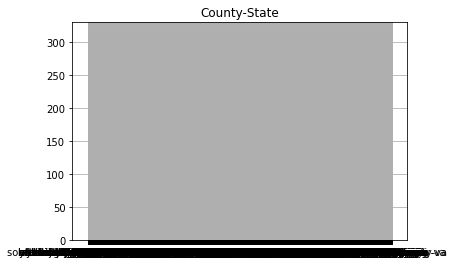

In [220]:
obj_colnames = obj_cols.columns
for col in obj_colnames:
    county_cancer[col].hist()
    plt.title(col)
    plt.show()

In [221]:
county_cancer["metro"] = county_cancer["metro"].map({
    "yes" : 1,
    "no" : 0
}).astype(float)

county_cancer["median_edu"] = county_cancer["median_edu"].map({
    "below_hs" : 0,
    "hs_diploma" : 0.5,
    "some_college" : 0.75,
    "bachelors" : 1
}).astype(float)

In [222]:
county_cancer.rename(columns = {"Recent Trend" : "recent_trend_cat"}, inplace = True)

In [223]:
county_cancer.head()

,name,fips,age_over_65,state,pop2000,pop2010,pop2017,pop_change,poverty,homeownership,multi_unit,unemployment_rate,metro,median_edu,median_hh_income,smoking_ban,FIPS,incidence_rate_per_100k,recent_trend_cat,5yr_trend,County-State
0,Autauga County,1001,15.0,Alabama,43671.0,54571,55504.0,1.48,13.7,77.5,7.2,3.86,1.0,0.75,55317.0,0.0,1001.0,124.6,stable,0.3,autauga-al
1,Baldwin County,1003,20.0,Alabama,140415.0,182265,212628.0,9.19,11.8,76.7,22.6,3.99,1.0,0.75,52562.0,0.0,1003.0,105.6,rising,1.0,baldwin-al
2,Barbour County,1005,18.6,Alabama,29038.0,27457,25270.0,-6.22,27.2,68.0,11.1,5.90,0.0,0.50,33368.0,0.5,1005.0,77.9,stable,-1.6,barbour-al
3,Bibb County,1007,15.9,Alabama,20826.0,22915,22668.0,0.73,15.2,82.9,6.6,4.39,1.0,0.50,43404.0,0.0,1007.0,116.3,stable,2.1,bibb-al
4,Blount County,1009,17.9,Alabama,51024.0,57322,58013.0,0.68,15.6,82.0,3.7,4.02,1.0,0.50,47412.0,0.0,1009.0,97.4,stable,0.4,blount-al


In [224]:
county_cancer.to_csv("data/processed/county_cancer.csv")